---
*Interpolasi Newton*
---


Case Base 2
Interpolasi Newton
Kelompok 1

Data yang didapat:
  x    f(x) 
 0.1   0.028
 0.3   0.065
 0.5   0.146
 0.7   0.247
 0.9   0.368
Masukkan nilai x untuk dihitung: 0.8


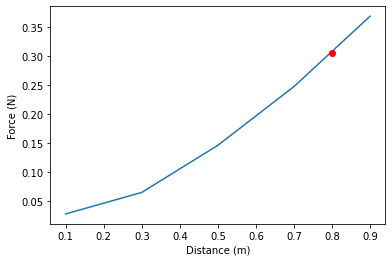

Hasil perhitungan:
f(0.8) = 0.304


In [1]:
kelompok = """
Case Base 2
Interpolasi Newton
Kelompok 1
"""
print(kelompok)

import numpy as np
import matplotlib.pyplot as plt

def print_data():
    print("Data yang didapat:")
    print("{:^5}  {:^5}".format("x", "f(x)"))
    for i in range(len(x)):
        print("{:^5.1f}  {:^5.3f}".format(x[i], fx[i]))

def divided_diff(f, x):
    n = len(x)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            f[i] = (f[i] - f[i-1]) / (x[i] - x[i-j])
    return f

def eval_newton(x, f, xa):
    n = len(x) - 1
    res = f[n]
    for i in range(n-1, -1, -1):
        res = res * (xa - x[i]) + f[i]
    return res

x = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
fx = np.array([0.028, 0.065, 0.146, 0.247, 0.368])

print_data()

f = np.copy(fx)
divided_diff(f, x)

xa = float(input("Masukkan nilai x untuk dihitung: "))
fxa = eval_newton(x, f, xa)

plt.plot(x, fx)
plt.plot(xa, fxa, 'ro')
plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.show()

print("Hasil perhitungan:")
print("f({:.1f}) = {:.3f}".format(xa, fxa))


---
*Cubic Spline*
---


Case Base 2
Cubic Spline
Kelompok 1

Tabel Data Perhitungan 
 	 j 	 x(j) 	 a(j) 	 b(j) 	 c(j) 	 d(j)
	 j 	 x 	 a 	 b 	 c 	 d
	 0 	 56.6 	 -895.3 	 3.7628133019057928 	 0.0 	 -0.002279824994289518
	 1 	 63.7 	 -869.4 	 3.418035368019389 	 -0.04856027237836674 	 0.00018993951960387924
	 2 	 163.6 	 -823.2 	 -0.5975121380525543 	 0.008364601646915859 	 -3.353439487800624e-05
	 3 	 279.5 	 -832.3 	 -0.009980940881151451 	 -0.003295307452166912 	 4.376772011295819e-05
	 4 	 335.7 	 -835.5 	 0.03433965523600252 	 0.0040839301588778375 	 6.0505451127526244e-06
	 5 	 384.7 	 -823.3 	 0.47814688725318777 	 0.004973360290452473 	 -2.4359539642025085e-05
	 6 	 420.4 	 -801.0 	 0.7401068429564006 	 0.0023644535947915874 	 0.00015703846807632447
	 7 	 448.3 	 -775.1 	 1.2387642953516478 	 0.015508573372779961 	 0.0016854778731782306
	 8 	 465.2 	 -741.6 	 3.2071220814269092 	 0.10096230154291613 	 -0.0021714552773616272
	 9 	 490.5 	 -631.0 	 4.146034114039251 	 -0.06385115400883147 	 0.0003970700

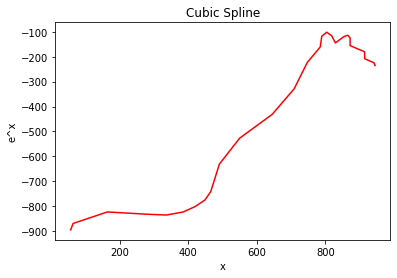

In [2]:
kelompok = """
Case Base 2
Cubic Spline
Kelompok 1
"""
print(kelompok)

from numpy import*
import numpy
import matplotlib.pylab as plt

x = [  56.6,   63.7,  163.6,  279.5,  335.7,  384.7,  420.4,  448.3,  465.2,  490.5,  549.5,  644.5,  708.5,  747.0,  784.8,  789.1,  803.5,  818.0,  828.9,
      853.5,  864.8,  871.8,  871.9,  914.0,  914.5,  941.5,  944.5]
y = [-895.3, -869.4, -823.2, -832.3, -835.5, -823.3, -801.0, -775.1, -741.6, -631.0, -527.1, -431.4, -328.9, -222.7, -160.4, -117.6, -101.6, -115.6, -144.5,
     -119.2, -113.6, -124.5, -155.4, -180.1, -208.1, -224.2, -235.1]
n = len(x)-1

print('Tabel Data Perhitungan', '\n', '\t', 'j', '\t', 'x(j)', '\t', 'a(j)', '\t', 'b(j)', '\t', 'c(j)', '\t', 'd(j)')
a   = [y[i] for i in range(n+1)]
h   = [x[i+1]-x[i] for i in range(n)]
alp = [3*((y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]) for i in range(1, n)]
alp.insert(0, 0)

l   = [1]*(n+1)
miu = [0]*(n+1)
z   = [0]*(n+1)

for i in range(1, n, 1):
    l[i]   = (2*(x[i+1]-x[i-1]))-(h[i-1]*miu[i-1])
    miu[i] = h[i]/l[i]
    z[i]   = (alp[i]-h[i-1]*z[i-1])/l[i]

b = [0]*(n+1)
c = [0]*(n+1)
d = [0]*(n+1)

for j in range(n-1, -1, -1):
    c[j] = z[j]-miu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j]-(h[j]*(c[j+1]+2*c[j]))/3
    d[j] = (c[j+1]-c[j])/(3*h[j])

print('\t', 'j', '\t', 'x', '\t', 'a', '\t', 'b', '\t', 'c', '\t', 'd')

for j in range (0, n):
    print('\t', j, '\t', x[j], '\t', a[j], '\t', b[j], '\t', c[j], '\t', d[j])
    
print('\t', n, '\t', x[n], '\t', a[n])

m = int(input("Masukkan banyaknya titik dalam selang : "))
print('\n', 'Hasil interpolasi titik')
print('x', '\t','S')

bb = 0
ba = 0
xl = 0
S  = 0

for j in range(0, n):
    bb = x[j]
    ba = x[j+1]

    for i in range(0, m+1):
        xl = bb+((i*(ba-bb))/m)
        S  = a[j]+(b[j]*(xl-x[j]))+(c[j]*(xl-x[j]))+(d[j]*(xl-x[j]))

        print(xl, '\t', S)

plt.plot(x, y, 'r', xl, S)
plt.title('Cubic Spline')
plt.xlabel('x')
plt.ylabel('e^x')
plt.show()
